In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

### Reading Dataset

In [25]:
df = pd.read_csv('boston.csv')

### Checking head elements

In [26]:
df.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


### Checking tail elements

In [27]:
df.tail(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
496,0.28960,0.0,9.69,0,0.585,5.390,72.9,2.7986,6,391,19.2,396.90,21.14,19.7
497,0.26838,0.0,9.69,0,0.585,5.794,70.6,2.8927,6,391,19.2,396.90,14.10,18.3
498,0.23912,0.0,9.69,0,0.585,6.019,65.3,2.4091,6,391,19.2,396.90,12.92,21.2
499,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


### Checking shape of dataset

In [28]:
df.shape

(506, 14)

### Dealing with null values

In [29]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [30]:
df.rm.fillna(df.rm.mean(),inplace = True)

In [31]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [32]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702085,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.210000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.618750,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Data Visualization

#### Outliers

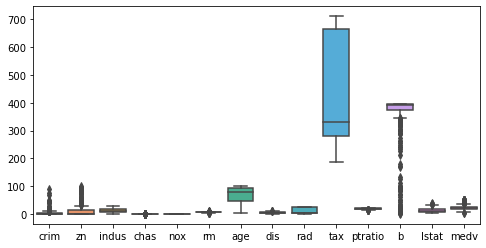

In [33]:
plt.figure(figsize=[8,4])
sns.boxplot(data=df)
plt.show()

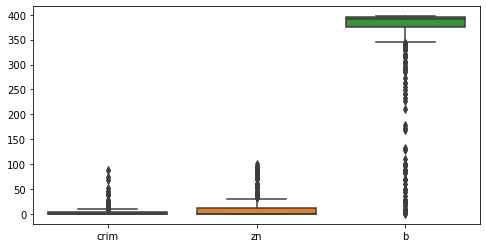

In [34]:
plt.figure(figsize=[8,4])
sns.boxplot(data=df[['crim', 'zn', 'b']])
plt.show()

#### Correlation Matrix

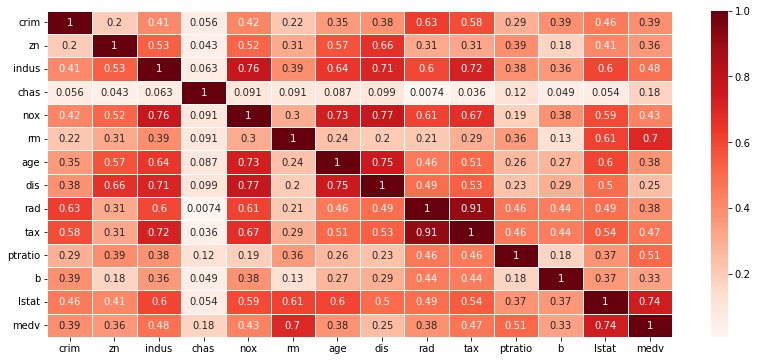

In [35]:
plt.figure(figsize=(14,6))
corr=abs(df.corr())
sns.heatmap(corr,annot=True,linewidth=1,cmap="Reds")
plt.show()

#### Scatter Plots for Positive and Negative Correlation

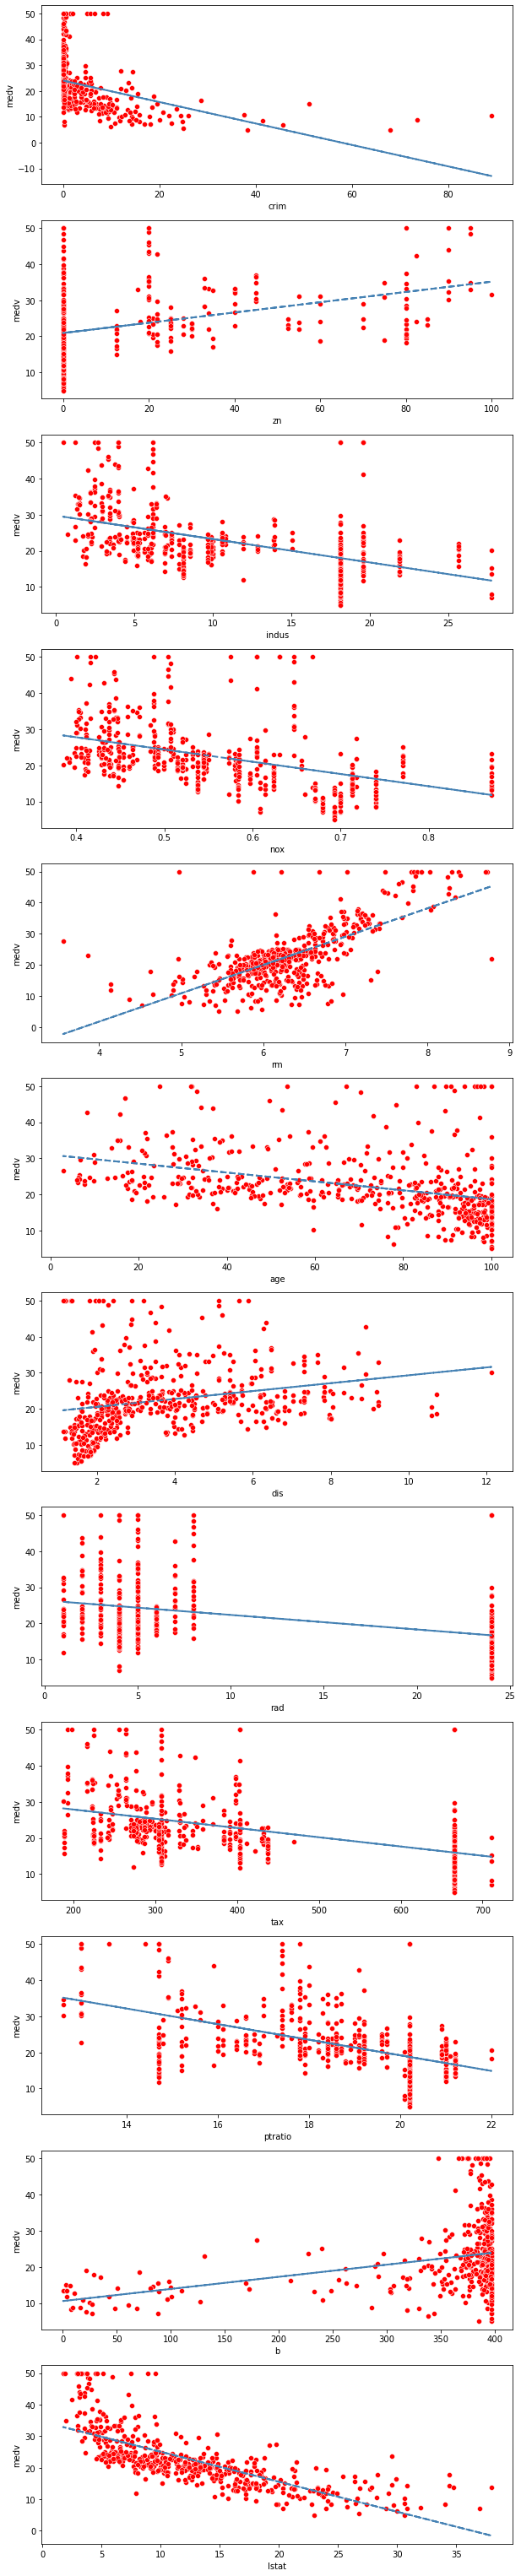

In [36]:
i = 1
plt.subplots(figsize = (10,60))

for col in df.columns:
    if col!='medv' and col!='chas':
        a,b = np.polyfit(df[col],df['medv'],1)
        plt.subplot(13,1,i)
        sns.scatterplot(x = df[col],y = df['medv'],color = 'red')
        plt.plot(df[col], a * df[col] + b, color='steelblue', linestyle='--', linewidth=2)
        
        i+=1

plt.show()

#### Countplot for categorical variable

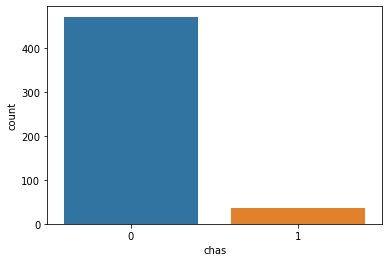

In [37]:
sns.countplot(x = df['chas'],data = df)
plt.show()

### Train Test Split

In [39]:
train_df,test_df = train_test_split(df,test_size = 0.30)

In [40]:
trainX  = train_df.iloc[:,:-1]
trainY = train_df.iloc[:,-1]

In [41]:
testX = train_df.iloc[:,:-1]
testY = train_df.iloc[:,-1]

### Model Building

In [42]:
model = LinearRegression(fit_intercept = True)

In [43]:
model.fit(trainX,trainY)

LinearRegression()

In [44]:
pred = model.predict(testX)

In [45]:
pred

array([22.31382541, 20.18795461, 33.766468  , 20.846947  , 20.33834842,
       26.53699999, 38.18379086, 16.05092175, 18.77923643, 31.93479088,
       22.950817  , 17.13600117, 23.02045731, 27.78756617, 32.61453634,
       17.54581011, 26.08993469, 26.29802618, 14.21096768, 14.60750328,
       19.49695467, 31.9846461 , 19.28773996, 35.56183161, 15.02460285,
       12.34058411, 38.60196814, 21.66160296, 10.94389691, 22.68360199,
       35.76263373,  6.17975073, 16.59509287, 25.9450396 , 34.50177371,
       20.77075718, 21.71345928, 14.08409524, 24.59993337, 22.57332909,
       17.51463084, 31.26079116, 28.82730698, 22.87338613, 29.86009026,
       27.66327635, 20.11778286, 18.14031159, 25.37043681, 36.13213351,
        8.25218505, 29.71804179, 25.16355071, 20.56489678, 17.61127966,
       25.05077672, 38.89918429, 17.73051628, 16.09943887, 29.49423789,
       23.59562895, 30.74481316, 23.85070671, 29.13443431, 19.93720912,
       17.8364629 , 23.08414994, 19.85194998, 31.74082384, 25.62

### Evaluating the model

In [46]:
mae = mean_absolute_error(testY,pred)
mae

3.3130915238618495

In [47]:
mse = mean_squared_error(testY,pred)
mse

22.244178575121865

In [48]:
r2 = r2_score(testY,pred)
r2

0.7398930909786514

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


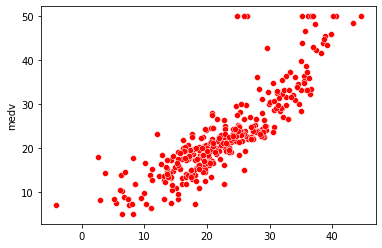

In [49]:
sns.scatterplot(pred,testY,color ='red')
plt.show()